## Debugging with python
This notebook show how, you can use the mechanism to embed python code for debugging. The idea is taken from https://wookayin.github.io/TensorflowKR-2016-talk-debugging/#53

We show an example for linear regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(30,)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


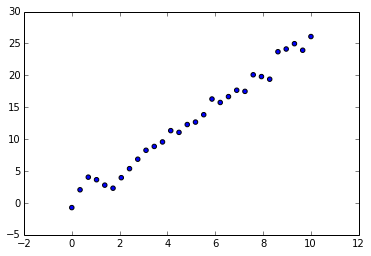

In [2]:
N = 30
x_data = (np.linspace(0,10,N)).astype('float32')
y_data = (2.42 * x_data + 0.42 + np.random.normal(0,1,N)).astype('float32')
plt.scatter(x_data,y_data)
np.shape(x_data)

In [3]:
tf.reset_default_graph()
# Defining the graph (construction phase)
a = tf.Variable(1.0, name = 'a') #Note that 1.0 is needed
b = tf.Variable(0.01, name = 'b')
x = tf.placeholder('float32', [N], name='x_data')
y = tf.placeholder('float32', [N], name='y_data')
loss = tf.reduce_sum(tf.square(a*x + b - y)) #Sum is called reduce_sum 

Defining the debug function

In [4]:
def _debug_plot(a_val, b_val, x_val, y_val):
    plt.scatter(x_val,y_val)
    ablineValues = [a_val * x_ + b_val for i, x_ in enumerate(x_val)]
    plt.plot(x_val, ablineValues)
    return False

We now have to loop the into the graph. We do this by decorating the loss function.

In [5]:
debug_op = tf.py_func(_debug_plot, [a, b, x, y], [tf.bool])
with tf.control_dependencies(debug_op): 
    loss = tf.identity(loss, name='out')

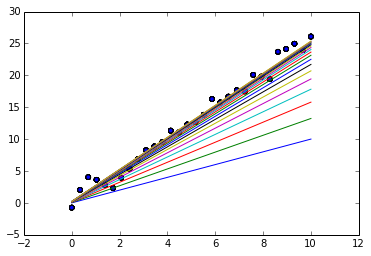

In [6]:
train_op = tf.train.GradientDescentOptimizer(0.0001).minimize(loss) 
init_op = tf.initialize_all_variables() #Initialization

epochs = 20
with tf.Session() as sess:
    sess.run(init_op) #Running the initialization
    for e in range(epochs): #Fitting the data for some epochs
        res = sess.run([loss, train_op, a, b], feed_dict={x:x_data, y:y_data})  